[View in Colaboratory](https://colab.research.google.com/github/rehabreda/machine_learning/blob/master/text_classification.ipynb)

In [0]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import Model
from keras.layers import Dense, LSTM , Activation , Dropout , Input , Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
% matplotlib inline

In [3]:
# load data to colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spam.csv to spam.csv
User uploaded file "spam.csv" with length 503663 bytes


In [0]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Number of ham and spam messages')

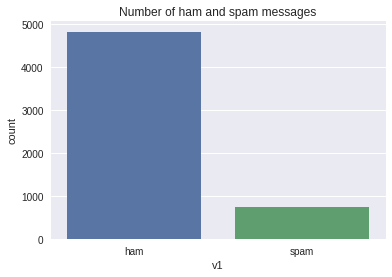

In [10]:
sns.countplot(df['v1'])
plt.title('Number of ham and spam messages')

In [0]:
x=df['v2']
y=df['v1']

In [0]:
le=LabelEncoder()
y=le.fit_transform(y)
y=y.reshape(-1,1)

In [0]:
# split data into training and testing 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.15)

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(train_x)
sequences = tok.texts_to_sequences(train_x)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [0]:
# RNN Structure
def RNN():
  inputs=Input(name='inputs',shape=[max_len])
  layer=Embedding(max_words,50,input_length=max_len)(inputs)
  layer=LSTM(64)(layer)
  layer=Dense(256,name='FC1')(layer)
  layer=Activation('relu')(layer)
  layer=Dropout(.5)(layer)
  layer=Dense(1,name='output_layer')(layer)
  layer=Activation('sigmoid')(layer)
  model=Model(inputs=inputs,outputs=layer)
  return model
  
  

In [0]:
model=RNN()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [30]:
model.fit(sequences_matrix,train_y,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 8s 2ms/step - loss: 0.0377 - acc: 0.9892 - val_loss: 0.0492 - val_acc: 0.9852
Epoch 2/10
3788/3788 [==============================] - 8s 2ms/step - loss: 0.0293 - acc: 0.9910 - val_loss: 0.0401 - val_acc: 0.9916
Epoch 3/10
3788/3788 [==============================] - 8s 2ms/step - loss: 0.0205 - acc: 0.9950 - val_loss: 0.0564 - val_acc: 0.9842


In [0]:
# process test set
test_sequences=tok.texts_to_sequences(test_x)
test_matrix=pad_sequences(test_sequences,maxlen=max_len)

In [39]:
accuracy=model.evaluate(test_matrix,test_y)

836/836 [==============================] - 1s 699us/step


In [40]:
print('loss : {} \n accuracy {}'.format(accuracy[0],accuracy[1]))

loss : 0.04711326766223312 
 accuracy 0.9844497607655502
